In [3]:
import pennylane as qml
import torch
import torchvision
from torchvision import transforms, datasets

In [6]:
#download data to the local work directory. convert to torch tensors
train = datasets.MNIST("", train=True, download = True,
                       transform = transforms.Compose([transforms.ToTensor()]) )

  0%|          | 0/9912422 [00:00<?, ?it/s]

100%|█████████▉| 9912320/9912422 [00:55<00:00, 165634.54it/s]

Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw



0it [00:00, ?it/s]


32768it [00:00, 97459.85it/s]

0it [00:00, ?it/s]
  0%|          | 8192/1648877 [00:00<00:22, 72962.85it/s]

Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw



 76%|███████▌  | 1245184/1648877 [00:13<00:05, 77976.34it/s] 
9920512it [01:10, 165634.54it/s]                             [A
100%|█████████▉| 1646592/1648877 [00:19<00:00, 117933.03it/s]

8192it [00:00, 223963.04it/s]


Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw
Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw
Processing...
Done!


In [7]:
test = datasets.MNIST("", train=False, download = True,
                       transform = transforms.Compose([transforms.ToTensor()]) )


1654784it [00:33, 117933.03it/s]                             

In [8]:
train

Dataset MNIST
    Number of datapoints: 60000
    Root location: 
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )

In [104]:
# load training data, batch_size = how many datapoints to be passed for one opt step
# to the model, 
trainset = torch.utils.data.DataLoader(train, batch_size= 1, shuffle= True)
trainset

In [105]:
testset = torch.utils.data.DataLoader(test, batch_size= 1, shuffle= True)

In [106]:
for data in trainset:
    print(data)
    break

[tensor([[[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000,

In [107]:
x,y = data

In [109]:
x.shape

torch.Size([1, 1, 28, 28])

In [110]:
y

tensor([4])

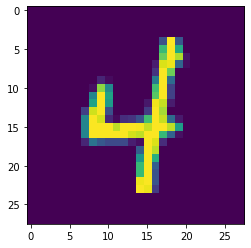

In [111]:
import matplotlib.pyplot as plt
plt.imshow(x.view(28,28))
plt.show()

In [72]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28*28, 64) #fully connected layer, input flattened 28*28 image
        self.fc2 = nn.Linear(64,64)
        self.fc3 = nn.Linear(64, 10)
        
    def forward(self, x):  #what to do with data in these layers
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x, dim=1)   #dim=1 
        

In [74]:
mynet = Net()

In [75]:
mynet

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

In [76]:
import torch.optim as optim
o = optim.Adam(mynet.parameters(), lr = 0.001)

In [77]:
epochs=3

In [78]:
for epoch in range(epochs):
    for data in trainset:
        X,y = data
        mynet.zero_grad()
        output = mynet(X.view(-1,28*28))
        loss = F.nll_loss(output,y)
        loss.backward()
        o.step()
    print(loss)

tensor(0.2132, grad_fn=<NllLossBackward>)
tensor(0.0947, grad_fn=<NllLossBackward>)
tensor(0.0117, grad_fn=<NllLossBackward>)


In [81]:
X,y

(tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         ...,
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ..

In [82]:
y[1]

tensor(7)

In [85]:
torch.argmax(mynet(X[1].view(-1,28*28)))

tensor(7)

In [87]:
mynet(X[1].view(-1,28*28))

tensor([[-2.2584e+01, -1.7169e+01, -1.1706e+01, -1.4992e+01, -2.8916e+01,
         -2.4873e+01, -3.3822e+01, -8.5830e-06, -2.3508e+01, -1.9669e+01]],
       grad_fn=<LogSoftmaxBackward>)

In [90]:
c = 0
t = 0
with torch.no_grad():
    for data in trainset:
        X,y = data
        output = mynet(X.view(-1,784))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                c+=1
            t+=1
print(c/t)

0.9782666666666666


In [ ]:
dev1 = qml.device('default.qubit', wires=1)

# define neural network

class NeuralNet(nn.Module):
    def __init__(self, classifier, n_wire):
        super(NeuralNet, self).__init__()
        self.classifier = classifier
        self.n_wire = n_wire
        self.phi = torch.tensor(0.011, requires_grad = True)
        self.theta = torch.tensor(0.012, requires_grad = True)
        
    def forward(self):
        print(self.phi,self.theta)

        @qml.qnode(dev1, interface='torch')
        def circuit(*params):
            self.classifier(*params)
            return qml.expval.PauliZ(0)

        return circuit(self.phi, self.theta)

# define custom classifiers

def test_rot(phi, theta):
    qml.RX(phi, wires=0)
    qml.RY(theta, wires=0)

# perform the optimization

testcl = NeuralNet(test_rot, 1)
opt = torch.optim.Adam([testcl.phi, testcl.theta], lr = 0.1) 

for i in range(400):
    opt.zero_grad()
    output = testcl()
    loss = output - 1
    loss.backward()
    opt.step()

In [112]:
from torch.utils.data import Dataset

class access_one_image(Dataset):
    def __init__(self, data):

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        return self.samples[idx]

In [113]:
access_one_image(train)

TypeError: __init__() takes 1 positional argument but 2 were given